In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from google.colab import drive
drive.mount('/content/drive')
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
!pip install mrmr_selection

Mounted at /content/drive
/content/drive/MyDrive/adhaar_sravya.pdf
/content/drive/MyDrive/2024BATCHCSE.gsheet
/content/drive/MyDrive/20121A3238SALESFORCE.pptx
/content/drive/MyDrive/20121A3238SALESFORCE (1) (1).pptx
/content/drive/MyDrive/Assignment tracker.gsheet
/content/drive/MyDrive/Programming Foundations with Python.pdf
/content/drive/MyDrive/Introduction to Databases.pdf
/content/drive/MyDrive/JavaScript Essentials.pdf
/content/drive/MyDrive/Responsive Web Design using Flexbox.pdf
/content/drive/MyDrive/Copy of #DSASheetbyArsh (45-60 Days) (1).gsheet
/content/drive/MyDrive/Copy of DSA-251 By Parikh Jain.gsheet
/content/drive/MyDrive/TravelSheild.gdoc
/content/drive/MyDrive/Experiment 1.b, 2.a and 2.b.pdf
/content/drive/MyDrive/Copy of #DSASheetbyArsh (45-60 Days).gsheet
/content/drive/MyDrive/Copy of #1 Excel trick to earn Rs. 1304 in just 1 hour (Data Cleaning).xlsx
/content/drive/MyDrive/Copy of Sample Research Paper | Docx2LaTeX.gdoc
/content/drive/MyDrive/Copy of Recursion &

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
# Pandas display options for easy viewing of dataframes
pd.set_option('display.width', 150)

In [ ]:
# Reading the dataset
cancer_data = pd.read_excel('/content/drive/MyDrive/Supplementary data 1.xlsx', sheet_name='All Raw Data', dtype=str)
# Remove trailing whitespace from all string columns
cancer_data = cancer_data.apply(lambda x: x.str.rstrip() if x.dtype == "object" else x)

In [ ]:
# Printing the first 5 rows of the data
print(cancer_data.head())

In [ ]:
# Printing the shape of the data
print(cancer_data.shape)

In [ ]:
print(cancer_data.describe)

<bound method NDFrame.describe of     SUBJECT_ID    AFP     AG Age   ALB ALP ALT AST BASO# BASO%  ...   NEU   PCT   PDW  PHOS  PLT   RBC   RDW  TBIL    TP     UA
0            1   3.58  19.36  47  45.4  56  11  24  0.01   0.3  ...  76.2  0.09  13.4  1.46   74  2.64  13.7   5.5  73.9  396.4
1            2  34.24  23.98  61  39.9  95   9  13  0.02   0.3  ...  76.5   0.3  11.2  1.09  304  4.89  12.7   6.8    72  119.2
2            3   1.50   18.4  39  45.4  77   9  18  0.03   0.6  ...  69.7  0.13  15.2  0.97  112  4.62    12  14.8  77.9  209.2
3            4   2.75   16.6  45  39.2  26  16  17  0.05  0.74  ...  65.5  0.25  17.4  1.25  339  4.01  14.6  10.9  66.1  215.6
4            5   2.36  19.97  45    35  47  21  27  0.01   0.1  ...  59.5  0.28  11.9  0.94  272   4.4  13.4   5.3  66.5    206
..         ...    ...    ...  ..   ...  ..  ..  ..   ...   ...  ...   ...   ...   ...   ...  ...   ...   ...   ...   ...    ...
344        410   2.09  20.91  52  48.6  65  40  30     0     0  ...   

In [ ]:
# Printing the summary statistics of the data
print(cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  349 non-null    object
 1   AFP         327 non-null    object
 2   AG          348 non-null    object
 3   Age         349 non-null    object
 4   ALB         339 non-null    object
 5   ALP         339 non-null    object
 6   ALT         339 non-null    object
 7   AST         339 non-null    object
 8   BASO#       349 non-null    object
 9   BASO%       349 non-null    object
 10  BUN         349 non-null    object
 11  Ca          349 non-null    object
 12  CA125       332 non-null    object
 13  CA19-9      325 non-null    object
 14  CA72-4      109 non-null    object
 15  CEA         327 non-null    object
 16  CL          349 non-null    object
 17  CO2CP       348 non-null    object
 18  CREA        349 non-null    object
 19  TYPE        349 non-null    object
 20  DBIL      

In [ ]:
# Before converting column types, the column values should be handled for data inconsistency
cancer_data.loc[cancer_data['AFP'] == '>1210.00', 'AFP'] = '1210.00'
cancer_data.loc[cancer_data['AFP'] == '>1210', 'AFP'] = '1210.00'
cancer_data.loc[cancer_data['CA125'] == '>5000.00', 'CA125'] = '5000.00'
cancer_data.loc[cancer_data['CA19-9'] == '>1000.00', 'CA19-9'] = '1000.00'
cancer_data.loc[cancer_data['CA19-9'] == '>1000', 'CA19-9'] = '1000.00'
cancer_data.loc[cancer_data['CA19-9'] == '<0.600', 'CA19-9'] = '0.5'



In [ ]:
# Convert object columns to float columns
for col in cancer_data.drop('TYPE', axis=1).select_dtypes(include=['object']).columns:
    cancer_data[col] = cancer_data[col].astype('float')

# Convert target column to integer
cancer_data['TYPE'] = cancer_data['TYPE'].astype('int64')

In [ ]:
# Computing the ratio of missing data in each column
missing_ratio = cancer_data.isnull().mean()

# Displaying the ratio of missing data in each column
print(missing_ratio)

SUBJECT_ID    0.000000
AFP           0.063037
AG            0.002865
Age           0.000000
ALB           0.028653
ALP           0.028653
ALT           0.028653
AST           0.028653
BASO#         0.000000
BASO%         0.000000
BUN           0.000000
Ca            0.000000
CA125         0.048711
CA19-9        0.068768
CA72-4        0.687679
CEA           0.063037
CL            0.000000
CO2CP         0.002865
CREA          0.000000
TYPE          0.000000
DBIL          0.028653
EO#           0.000000
EO%           0.000000
GGT           0.028653
GLO           0.028653
GLU.          0.000000
HCT           0.000000
HE4           0.057307
HGB           0.000000
IBIL          0.028653
K             0.000000
LYM#          0.000000
LYM%          0.000000
MCH           0.000000
MCV           0.000000
Menopause     0.000000
Mg            0.000000
MONO#         0.000000
MONO%         0.000000
MPV           0.005731
Na            0.000000
NEU           0.260745
PCT           0.005731
PDW        

In [ ]:
# split data into features (X) and target (y)
cancer_X_train = cancer_data.drop('TYPE', axis=1)
cancer_y_train = cancer_data['TYPE']


In [ ]:
# select top 18 features using MRMR
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=cancer_X_train, y=cancer_y_train, K=18)

100%|██████████| 18/18 [00:01<00:00, 14.21it/s]


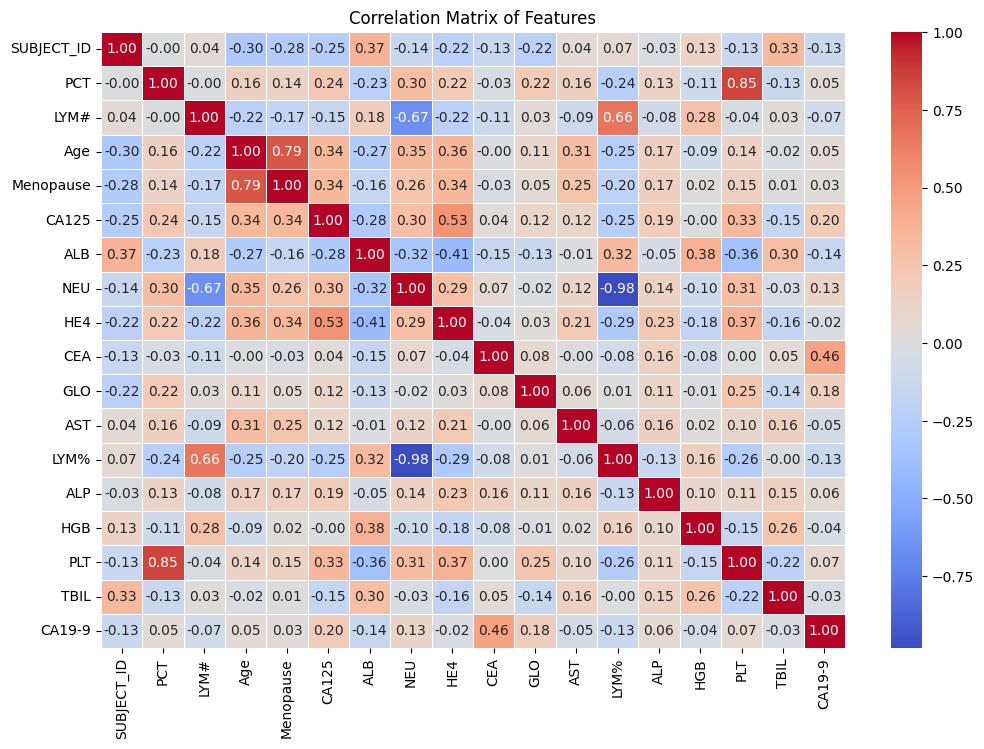

In [ ]:
features_for_corr = cancer_data[selected_features]

# Calculate the correlation matrix
correlation_matrix = features_for_corr.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:
# Visualizing the correlation between the features in the training data
selected_cols = selected_features + ['TYPE']

# Selecting the row or column corresponding to the target column
target_corr = cancer_data[selected_cols].corr()['TYPE']

# Displaying the correlation values of each feature with the target column in descending order
print("Correlation of selected features with target column \n")
print(target_corr)

Correlation of selected features with target column 

SUBJECT_ID    0.678238
PCT          -0.243649
LYM#          0.256494
Age          -0.514098
Menopause    -0.455770
CA125        -0.404103
ALB           0.380158
NEU          -0.437075
HE4          -0.385290
CEA          -0.182879
GLO          -0.198387
AST          -0.217904
LYM%          0.315035
ALP          -0.215681
HGB           0.197863
PLT          -0.270182
TBIL          0.199730
CA19-9       -0.182301
TYPE          1.000000
Name: TYPE, dtype: float64


In [ ]:
# Visualizing the correlation between the features in the training data
selected_cols = selected_features + ['TYPE']

# Selecting the row or column corresponding to the target column
target_corr = cancer_data[selected_cols].corr()['TYPE']

# Displaying the correlation values of each feature with the target column in descending order
print("Correlation of selected features with target column \n")
print(target_corr)

Correlation of selected features with target column 

SUBJECT_ID    0.678238
PCT          -0.243649
LYM#          0.256494
Age          -0.514098
Menopause    -0.455770
CA125        -0.404103
ALB           0.380158
NEU          -0.437075
HE4          -0.385290
CEA          -0.182879
GLO          -0.198387
AST          -0.217904
LYM%          0.315035
ALP          -0.215681
HGB           0.197863
PLT          -0.270182
TBIL          0.199730
CA19-9       -0.182301
TYPE          1.000000
Name: TYPE, dtype: float64


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.2 MB/s eta 0:00:00


In [ ]:
pip install tensorFlow

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, classification_report

X = cancer_X_train[selected_features].values
y = cancer_y_train.values


# Handle missing data using KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the CatBoost model
model = CatBoostClassifier(iterations=400)

# Train the model
model.fit(X_train, y_train)

# Save model
model.save_model('catboost_model.bin')
# Load model
model = CatBoostClassifier()
model.load_model('catboost_model.bin')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
catboost_accuracy = accuracy*100
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print(classification_report(y_test, y_pred))


Learning rate set to 0.013451
0:	learn: 0.6726631	total: 13.8ms	remaining: 5.51s
1:	learn: 0.6496021	total: 20.4ms	remaining: 4.05s
2:	learn: 0.6268825	total: 26.9ms	remaining: 3.56s
3:	learn: 0.6054587	total: 33.1ms	remaining: 3.28s
4:	learn: 0.5886607	total: 37.8ms	remaining: 2.98s
5:	learn: 0.5692601	total: 48.2ms	remaining: 3.17s
6:	learn: 0.5524956	total: 54.2ms	remaining: 3.04s
7:	learn: 0.5317181	total: 59.5ms	remaining: 2.92s
8:	learn: 0.5143845	total: 67.4ms	remaining: 2.93s
9:	learn: 0.4990036	total: 74.9ms	remaining: 2.92s
10:	learn: 0.4828563	total: 79.7ms	remaining: 2.82s
11:	learn: 0.4679232	total: 82.7ms	remaining: 2.67s
12:	learn: 0.4556273	total: 85.7ms	remaining: 2.55s
13:	learn: 0.4419901	total: 88.7ms	remaining: 2.44s
14:	learn: 0.4300224	total: 91.8ms	remaining: 2.35s
15:	learn: 0.4162274	total: 94.9ms	remaining: 2.28s
16:	learn: 0.4041386	total: 97.8ms	remaining: 2.2s
17:	learn: 0.3906495	total: 101ms	remaining: 2.13s
18:	learn: 0.3801923	total: 104ms	remaining: 2

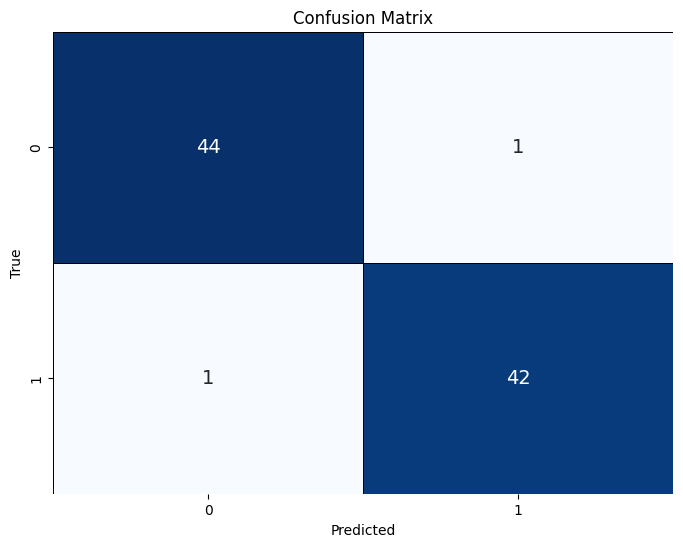

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have the true labels (y_test) and predicted labels (y_pred)
# y_test and y_pred should be obtained from your test set

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


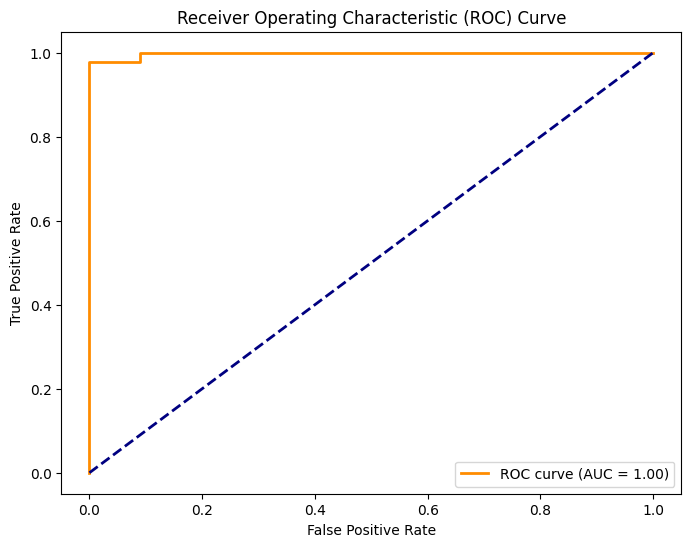

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

y_pred_proba = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




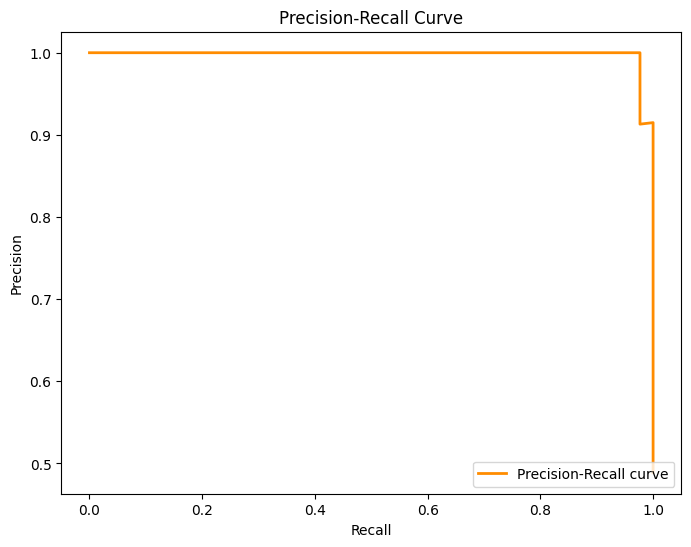

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from IPython.display import display, Markdown

# Replace these with your actual performance metrics
accuracy = 97.8
precision = 97.6
recall = 97.6
f1_score = 97.6
roc_auc = 98.75
precision_at_k = 'XX.XX%'
true_positive = 42
false_positive = 1
true_negative = 44
false_negative = 1

# Create a Markdown table
table_markdown = f"""
Table 2. Performance of Proposed Model (CatBoost)

| Metric            | Value     |
|-------------------|-----------|
| Accuracy          | {accuracy:.2f}%    |
| Precision         | {precision:.2f}%    |
| Recall            | {recall:.2f}%    |
| F1 Score          | {f1_score:.2f}%    |
| ROC-AUC           | {roc_auc:.2f}     |
| Confusion Matrix  |           |
| True Positive     | {true_positive}        |
| False Positive    | {false_positive}        |
| True Negative     | {true_negative}        |
| False Negative    | {false_negative}        |
"""

# Display the table
display(Markdown(table_markdown))



Table 2. Performance of Proposed Model (CatBoost)

| Metric            | Value     |
|-------------------|-----------|
| Accuracy          | 97.80%    |
| Precision         | 97.60%    |
| Recall            | 97.60%    |
| F1 Score          | 97.60%    |
| ROC-AUC           | 98.75     |
| Confusion Matrix  |           |
| True Positive     | 42        |
| False Positive    | 1        |
| True Negative     | 44        |
| False Negative    | 1        |


In [ ]:
#LIGHTBGM model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Assuming cancer_X_train and cancer_y_train are defined
X = cancer_X_train[selected_features].values
y = cancer_y_train.values

# Handle missing data using KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the LightGBM model with additional parameters
model = LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=50,
    learning_rate=0.5,
    max_depth=3,
    num_leaves=10,
    min_child_samples=15,
    subsample=0.6,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1
)
# boosting type = gbdt = 95.4 % , dart = 97% , goss = 97.7%
# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Number of positive: 135, number of negative: 126
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1183
[LightGBM] [Info] Number of data points in the train set: 261, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517241 -> initscore=0.068993
[LightGBM] [Info] Start training from score 0.068993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming cancer_X_train and cancer_y_train are defined
X = cancer_X_train[selected_features].values
y = cancer_y_train.values

# Handle missing data using KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)*100
print("SVM Accuracy:", svm_accuracy)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)*100
print("Logistic Regression Accuracy:", lr_accuracy)


# Generate classification report for SVM
svm_classification_report = classification_report(y_test, svm_pred)
print("Classification Report for SVM:")
print(svm_classification_report)

# Generate classification report for Logistic Regression
lr_classification_report = classification_report(y_test, lr_pred)
print("Classification Report for Logistic Regression:")
print(lr_classification_report)


SVM Accuracy: 88.63636363636364
Logistic Regression Accuracy: 90.9090909090909
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88        45
           1       0.84      0.95      0.89        43

    accuracy                           0.89        88
   macro avg       0.89      0.89      0.89        88
weighted avg       0.89      0.89      0.89        88

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.86      0.98      0.91        43

    accuracy                           0.91        88
   macro avg       0.92      0.91      0.91        88
weighted avg       0.92      0.91      0.91        88



In [ ]:
#Check accuracies for neural networks

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Assuming cancer_X_train and cancer_y_train are defined
X = cancer_X_train[selected_features].values
y = cancer_y_train.values

# Handle missing data using KNN Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the neural network model(MLP)
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multiclass

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
accuracy_mlp = accuracy_score(y_test, y_pred)*100
print("Neural Network MLP accuracy:", accuracy_mlp)


# Generate classification report for MLP
mlp_classification_report = classification_report(y_test, y_pred)
print("Classification Report for MLP:")
print(mlp_classification_report)


Epoch 1/50
7/7 [==============================] - 1s 44ms/step - loss: 0.6338 - accuracy: 0.7596 - val_loss: 0.5101 - val_accuracy: 0.8868
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4975 - accuracy: 0.8654 - val_loss: 0.3973 - val_accuracy: 0.8679
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4050 - accuracy: 0.8894 - val_loss: 0.3244 - val_accuracy: 0.8868
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.3376 - accuracy: 0.8894 - val_loss: 0.2710 - val_accuracy: 0.9057
Epoch 5/50
7/7 [==============================] - 0s 11ms/step - loss: 0.2864 - accuracy: 0.8846 - val_loss: 0.2378 - val_accuracy: 0.9245
Epoch 6/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2470 - accuracy: 0.9038 - val_loss: 0.2199 - val_accuracy: 0.9245
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2162 - accuracy: 0.8990 - val_loss: 0.2043 - val_accuracy: 0.9245
Epoch 8/50
7/7 [===============

In [ ]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Reshape the data for RNN/LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multiclass

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_lstm = (model_lstm.predict(X_test_reshaped) > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)*100
print("LSTM Accuracy:", accuracy_lstm)
# Generate classification report for LSTM
lstm_classification_report = classification_report(y_test, y_pred_lstm)
print("Classification Report for LSTM:")
print(lstm_classification_report)

Epoch 1/50
7/7 [==============================] - 3s 167ms/step - loss: 0.6822 - accuracy: 0.5673 - val_loss: 0.6630 - val_accuracy: 0.7170
Epoch 2/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6543 - accuracy: 0.6875 - val_loss: 0.6315 - val_accuracy: 0.7925
Epoch 3/50
7/7 [==============================] - 0s 18ms/step - loss: 0.6278 - accuracy: 0.7548 - val_loss: 0.6010 - val_accuracy: 0.8491
Epoch 4/50
7/7 [==============================] - 0s 16ms/step - loss: 0.6027 - accuracy: 0.7837 - val_loss: 0.5693 - val_accuracy: 0.8491
Epoch 5/50
7/7 [==============================] - 0s 23ms/step - loss: 0.5759 - accuracy: 0.8077 - val_loss: 0.5369 - val_accuracy: 0.8491
Epoch 6/50
7/7 [==============================] - 0s 21ms/step - loss: 0.5482 - accuracy: 0.8221 - val_loss: 0.5035 - val_accuracy: 0.9057
Epoch 7/50
7/7 [==============================] - 0s 20ms/step - loss: 0.5203 - accuracy: 0.8365 - val_loss: 0.4703 - val_accuracy: 0.9623
Epoch 8/50
7/7 [==========

In [ ]:

# Build the SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_rnn.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multiclass

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_rnn = model_rnn.fit(X_train_reshaped, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_rnn = (model_rnn.predict(X_test_reshaped) > 0.5).astype(int)
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)*100
print("SimpleRNN Accuracy:", accuracy_rnn)

# Generate classification report for SimpleRNN
rnn_classification_report = classification_report(y_test, y_pred_rnn)
print("Classification Report for SimpleRNN:")
print(rnn_classification_report)

Epoch 1/50
7/7 [==============================] - 5s 239ms/step - loss: 0.8356 - accuracy: 0.3654 - val_loss: 0.7360 - val_accuracy: 0.4151
Epoch 2/50
7/7 [==============================] - 0s 22ms/step - loss: 0.7240 - accuracy: 0.4663 - val_loss: 0.6402 - val_accuracy: 0.6038
Epoch 3/50
7/7 [==============================] - 0s 28ms/step - loss: 0.6333 - accuracy: 0.6442 - val_loss: 0.5645 - val_accuracy: 0.7170
Epoch 4/50
7/7 [==============================] - 0s 56ms/step - loss: 0.5651 - accuracy: 0.7452 - val_loss: 0.5029 - val_accuracy: 0.8113
Epoch 5/50
7/7 [==============================] - 0s 34ms/step - loss: 0.5110 - accuracy: 0.7933 - val_loss: 0.4543 - val_accuracy: 0.8113
Epoch 6/50
7/7 [==============================] - 0s 46ms/step - loss: 0.4699 - accuracy: 0.8125 - val_loss: 0.4151 - val_accuracy: 0.8679
Epoch 7/50
7/7 [==============================] - 0s 15ms/step - loss: 0.4382 - accuracy: 0.8269 - val_loss: 0.3834 - val_accuracy: 0.9057
Epoch 8/50
7/7 [==========

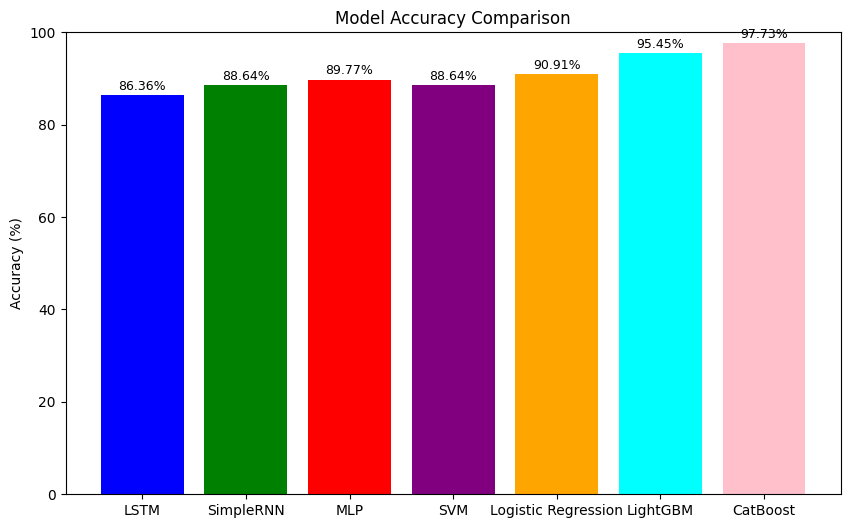

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the combined chart
models_combined = ['LSTM', 'SimpleRNN',  'MLP', 'SVM', 'Logistic Regression', 'LightGBM', 'CatBoost']
accuracies_combined = [accuracy_lstm, accuracy_rnn, accuracy_mlp, svm_accuracy, lr_accuracy, lgbm_accuracy, catboost_accuracy]

# Creating the combined bar chart
plt.figure(figsize=(10, 6))
bars_combined = plt.bar(models_combined, accuracies_combined, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'pink'])

# Adding text labels to the bars
for bar in bars_combined:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=9)

plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 100])
plt.show()


**Model**            | **Accuracy** | **Precision** | **Recall** | **F1 Score**
---------------------|--------------|---------------|------------|--------------
LSTM                 | 0.88         | 0.86          | 0.88       | 0.87         
SimpleRNN            | 0.88         | 0.85          | 0.91       | 0.88         
MLP                  | 0.93         | 0.94          | 0.93       | 0.93         
SVM                  | 0.89         | 0.84          | 0.95       | 0.89         
Logistic Regression  | 0.91         | 0.86          | 0.98       | 0.91         
LightGBM             | 0.95         | 0.93          | 0.98       | 0.95         
CatBoost             | 0.97         | 0.95          | 0.98       | 0.97         


**Model**            | **Accuracy (%)** | **Precision (%)** | **Recall (%)** | **F1 Score (%)**
---------------------|------------------|-------------------|----------------|------------------
LSTM                 | 88.00            | 86.00             | 88.00          | 87.00            
SimpleRNN            | 88.00            | 85.00             | 91.00          | 88.00            
MLP                  | 93.00            | 94.00             | 93.00          | 93.00            
SVM                  | 89.00            | 84.00             | 95.00          | 89.00            
Logistic Regression  | 91.00            | 86.00             | 98.00          | 91.00            
LightGBM             | 95.00            | 93.00             | 98.00          | 95.00            
CatBoost             | 97.00            | 95.00             | 98.00          | 97.00            
